In [75]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [69]:
latent_space_size = 15

In [70]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [71]:
import autoencoder
import importlib
importlib.reload(autoencoder)


<module 'autoencoder' from 'c:\\Users\\jorgen\\Documents\\autoencoder\\autoencoder.py'>

In [72]:
    au = autoencoder.DenseAutoencoder(input_shape=(784,), layer_sizes=[128, 64, 32], latent_dim = 10)
    au.fit(x_train, epochs=10, batch_size=256)

    # decoded = au.predict(x_test)


Model: "functional_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_48 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_140 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_141 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_142 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_143 (Dense)            (None, 10)                330       
_________________________________________________________________
dense_144 (Dense)            (None, 64)                704       
_________________________________________________________________
dense_145 (Dense)            (None, 128)             

In [73]:
encoded = au.encode(x_test)
decoded = au.decode(encoded)


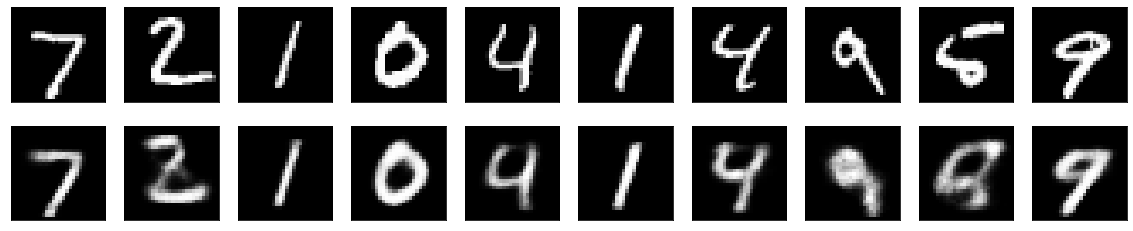

In [74]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()